In [54]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Reading Data

In [2]:
def segmentWords(s): 
    return s.split()

def readFile(fileName):
    # Function for reading file
    # input: filename as string
    # output: contents of file as list containing single words
    contents = []
    f = open(fileName)
    for line in f:
        contents.append(line)
    f.close()
    result = segmentWords('\n'.join(contents))
    return result


#### Create a Dataframe containing the counts of each word in a file

In [3]:
d = []

for c in os.listdir("data_training/train"):
    directory = "data_training/train/" + c
    for f in os.listdir(directory):
        words = readFile(directory + "/" + f)
        e = {x:words.count(x) for x in words}
        #e['__FileID__'] = directory
        e['__CLASS__'] = directory[-3:len(directory)]
        
        d.append(e)

Create a dataframe from d - make sure to fill all the nan values with zeros.

*Hint: Consider the `fillna()` function for Dataframes*

In [4]:
data = pd.DataFrame(d)


In [5]:
data = data.fillna(0)
data.shape
data.columns

Index(['', 'earth', 'goodies', 'if', 'ripley', 'suspend', 'they',
       'white', '', '',
       ...
       'zukovsky', 'zundel', 'zurg's', 'zweibel', 'zwick', 'zwick's',
       'zwigoff's', 'zycie', 'zycie'', '|'],
      dtype='object', length=42775)

In [6]:
indices = list(range(1129)) + list(range(1130, 1400))
len(indices)

X = data.iloc[:, indices].values


In [7]:

X.shape

(1400, 1399)

In [8]:
count = 0
totalcount = 0
for i in data['__CLASS__']:
    if i == 'pos':
        count+=1
    totalcount+=1


In [9]:
r = []
for x in data['__CLASS__'].values:
    if x == "pos":
        r+=[1.0]
    else:
        r+=[0.0]
r = np.asarray(r)
#####NOTE: 1.0 is pos, 0.0 is negative

In [10]:
data.columns.get_loc('__CLASS__')

1129

#### Split data into training and validation set 

* Sample 80% of your dataframe to be the training data

* Let the remaining 20% be the validation data (you can filter out the indicies of the original dataframe that weren't selected for the training data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, r, test_size=0.2, random_state=42)

* Split the dataframe for both training and validation data into x and y dataframes - where y contains the labels and x contains the words

*Hint: Try looking at the Dataframe `drop()` function*

In [12]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(280,)

# Logistic Regression

#### Basic Logistic Regression
* Use sklearn's linear_model.LogisticRegression() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

In [13]:
from sklearn.linear_model import LogisticRegression
logger = LogisticRegression()
logger.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
logger.score(X_train, y_train)


0.81785714285714284

In [15]:
logger.score(X_test, y_test)

0.61428571428571432

In [16]:
X_test.shape

(280, 1399)

#### Changing Parameters

In [17]:
lor = LogisticRegression(C = 0.1)
#only way is to decrease regularization term which is counter productive
lor.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
lor.score(X_train, y_train)
#no significant difference, so not really much overfitting

0.70714285714285718

In [19]:
plot_z = []
plot_c = []
plot_d = []

C = [.0001, .001, .01, .1, 1, 10, 100]
for c in C:
    plot_d.append(i)
    plot_c.append(c)
    q = LogisticRegression(C = c, max_iter = 100)
    cf = q.fit(X_train, y_train)
    plot_z.append(cf.score(X_test, y_test))
index = [i for i in range(len(plot_z)) if plot_z[i] == max(plot_z)][0]
plot_z




[0.59285714285714286,
 0.59999999999999998,
 0.6071428571428571,
 0.62142857142857144,
 0.61428571428571432,
 0.5892857142857143,
 0.5892857142857143]

In [20]:
lor.score(X_test, y_test)

0.62142857142857144

#### Feature Selection
* In the backward stepsize selection method, you can remove coefficients and the corresponding x columns, where the coefficient is more than a particular amount away from the mean - you can choose how far from the mean is reasonable.

*Hint: Numpy's `argwhere()` might be useful here*  
*Hint: Instead of defining a hard-coded constant to determine which features to keep or remove, consider using values relative to the distribution of the weight magnitudes*

In [21]:
#TODODODODODOD
means = []
for x in data.columns:
    if x == "__CLASS__":
        continue
    means.append(data[x].mean())
means = np.array(means)

In [22]:

zcores = [(x - means.mean())/means.std() for x in means ]

In [23]:
zcores

[-0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.036340469666042194,
 -0.02320851794273061,
 2.2448671439835119,
 23.702476259874629,
 -0.04384444207936309,
 -0.026960504149391065,
 -0.04384444207936309,
 -0.030712490356051517,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.03821646276937242,
 -0.032588483459381735,
 -0.026960504149391065,
 -0.041968448976032864,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.04384444207936309,
 -0.036340469666042194,
 -0.036340469666042194,
 -0.04384444207936309,
 -0.026960504149391065,
 -0.04384444207936309,
 -0.041968448976032864,
 -0.04384444207936309,
 -0.0

In [24]:
newzscores = [x for x in zcores if abs(x) > 0.1]
# the specific indices that I care about
indes = []
c = 0
for x in zcores:
    if abs(x) > 0.1:
        indes.append(c)
    c+=1

In [25]:
len(indes)

1234

(1400, 1234)

How did you select which features to remove? Why did that reduce overfitting?

In [31]:
#info to answer question found in report
X_new = data.iloc[:, indes].values
X_train_new1, X_test_new1, y_train_new1, y_test_new1 = train_test_split(X_new, r, test_size=0.2, random_state=42)



In [33]:
loreer = LogisticRegression(C = 0.1)

loreer.fit(X_train_new1, y_train_new1)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
plot_z = []
plot_c = []
plot_d = []

C = [.0001, .001, .01, .1, 1, 10, 100]
for c in C:
    plot_d.append(i)
    plot_c.append(c)
    q = LogisticRegression(C = c, max_iter = 100)
    cf = q.fit(X_train_new1, y_train_new1)
    plot_z.append(cf.score(X_test_new1, y_test_new1))
index = [i for i in range(len(plot_z)) if plot_z[i] == max(plot_z)][0]
plot_z

[0.59642857142857142,
 0.60357142857142854,
 0.64642857142857146,
 0.67500000000000004,
 0.65000000000000002,
 0.64642857142857146,
 0.64642857142857146]

In [38]:
loreer.score(X_train_new1, y_train_new1)

0.78660714285714284

# Single Decision Tree

#### Basic Decision Tree

* Initialize your model as a decision tree with sklearn.
* Fit the data and labels to the model.


In [79]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [80]:
clf.score(X_test, y_test)

0.55714285714285716

#### Changing Parameters
* To test out which value is optimal for a particular parameter, you can either loop through various values or look into `sklearn.model_selection.GridSearchCV`

In [88]:

de = [None, 2, 5, 10]
plot_d = []
plot_score_train = []
plot_score_test = []
for d in de:
    plot_d.append(d)
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    cf = clf.fit(X_train, y_train)
    plot_score_train.append(cf.score(X_train, y_train))
    plot_score_test.append(cf.score(X_test, y_test))
index = [i for i in range(len(plot_z)) if plot_z[i] == max(plot_z)][0]

tr = [0] + de[1:]


In [83]:
plot_d


[None, 2, 5, 10]

In [86]:
plot_score_test

[0.56428571428571428,
 0.64642857142857146,
 0.59285714285714286,
 0.5714285714285714]

How did you choose which parameters to change and what value to give to them? Feel free to show a plot.

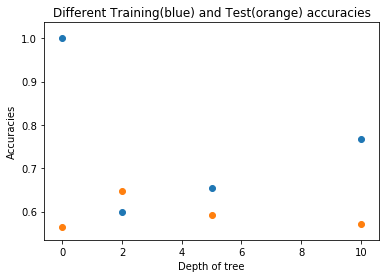

In [87]:
plt.scatter(tr, plot_score_train)
plt.scatter(tr, plot_score_test)
plt.title("Different Training(blue) and Test(orange) accuracies")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracies")
plt.show()

Why is a single decision tree so prone to overfitting?

# Random Forest Classifier

#### Basic Random Forest

* Use sklearn's ensemble.RandomForestClassifier() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.


In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [90]:
clf.score(X_train, y_train)
#am overfitting

1.0

In [91]:
clf.score(X_test, y_test)

0.62142857142857144

#### Changing Parameters

What parameters did you choose to change and why?

In [99]:
de = [None, 2, 5, 10, 20, 40]
plot_d = []
plot_score_train = []
plot_score_test = []
for d in de:
    plot_d.append(d)
    clf = RandomForestClassifier(criterion = 'entropy',n_estimators=100, max_depth = d)
    cf = clf.fit(X_train, y_train)
    plot_score_train.append(cf.score(X_train, y_train))
    plot_score_test.append(cf.score(X_test, y_test))
index = [i for i in range(len(plot_z)) if plot_z[i] == max(plot_z)][0]

tr = [0] + de[1:]

In [102]:
plot_score_test

[0.61428571428571432,
 0.61428571428571432,
 0.625,
 0.6071428571428571,
 0.59999999999999998,
 0.62142857142857144]

How does a random forest classifier prevent overfitting better than a single decision tree?

In [103]:
#each tree gets different data and is unidentical
#more in writeup